# Interpolacija funkcija

Zamislimo da imamo skup točaka, te da kroz njih želimo provući polinom najmanjeg stupnja. To možemo učiniti na sljedeći način,koristeći funkciju polyfit koja uzima točke i stupanj polinoma (koji je jednak broju točaka  minus 1). Funkcija polyfit vraća koeficijente polinoma, dok poly1d konstruira funkciju od tih koeficijenata

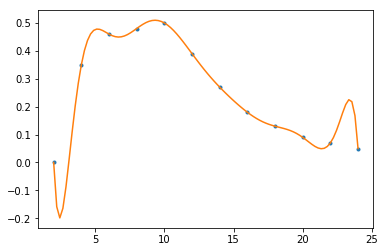

In [145]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([2 ,4 , 6, 8, 10 , 12, 14, 16, 18, 20, 22, 24])
f=np.array([0.0 ,0.35 , 0.46, 0.48, 0.50, 0.39,0.27,0.18,0.13,0.09, 0.07, 0.05])
p11 = np.poly1d(np.polyfit(x, f, 11))


xp = np.linspace(2, 24, 100)

plt.plot(x, f, '.', xp, p11(xp), '-')

U predavanjima zadnjeg tjedna prvog ciklusa, vidjet ćemo i tzv. kubične splajnove, što su posebni tipovi glatkih funkcija koje prolaze kroz zadane točke. U sljedećem kodu smo provukli kroz zadane točke tzv. kubični splajn.

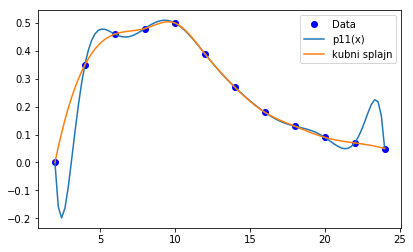

In [146]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, f)
fig, ax = plt.subplots(figsize=(6.5, 4))
plt.plot(x, f, 'bo', label="Data")
plt.plot(xp, p11(xp),label="p11(x)")
plt.plot(xp, cs(xp),label="kubni splajn")
ax.legend(loc='upper right')
plt.savefig("interolacija.eps") 

U sljedećem videu možete saznati što je to interpolacija i njezine osnove

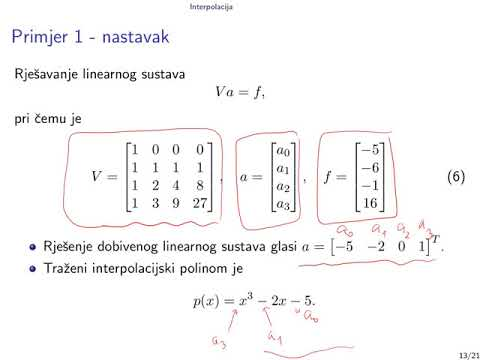

In [186]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("iUr9-RmpZyw")
display(vid)

Primjer iz video prezentacije

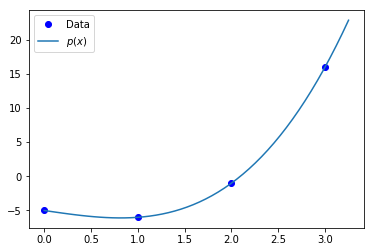

In [182]:
x=np.array([0 ,1 , 2, 3])
y=np.array([-5 ,-6, -1, 16])
a=np.array([1,0 , -2, -5])
z=np.linspace(0.0, 3.25, 50)
pp=np.polyval(a,z)
plt.plot(x, y, 'bo', label="Data")
plt.plot(z, pp,label=r'$p(x)$')
plt.legend(loc='upper left')

Dolje vidimo primjer implementacije hornerovog algoritma no ta funkcija  zapravo radi  isto što i polyval.
Nakon toga imamo primjer koji ukazuje na lošu uvjetovanost Vandermondeove matrice pa ne dobivamo polinom koji prolazi kroz zadane točke.

Condition= 7.6049026858454115e+71


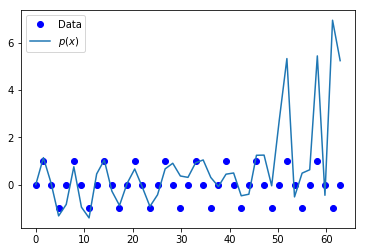

In [183]:
del a
del x
del y
del z
from scipy.linalg import lu_factor, lu_solve

def horner(a, x):
    v = a[0]
    #print(a.shape[0])
    for i in range(1, a.shape[0]):
        v = x * v + a[i]
    return v


n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
y=np.sin(x)
V=np.vander(x,len(x), increasing=True)
print("Condition=", np.linalg.cond(V))
#lu, piv = lu_factor(V)
#a = lu_solve((lu, piv), y)
a=np.linalg.solve(V,y)
c=np.flipud(a)
f=np.polyval(c,x)
k=horner(c,x) # isto kao i polyval, izvrednjavanje polinoma
plt.plot(x,y,'bo', label="Data")
plt.plot(x,f, label=r'$p(x)$')
plt.legend(loc='upper left')
plt.savefig("sinus.png") 



# Lagrangeov interpolacijski polinom

In [187]:
vid = YouTubeVideo("_55i23E8IyA")
display(vid)

Sada vidimo primjer interpolacije Lagrangeovim interpolacijskim polinomom

(-10, 10)

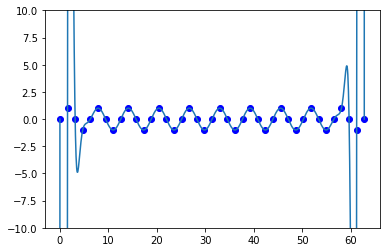

In [170]:
def polyinterp(x,y,u):
    n=len(x)
    v=np.zeros(np.size(u))
    for k in range(n):
        #print(k)
        w=np.ones(np.size(u))
        for j in range(k):
            w=(u-x[j])/(x[k]-x[j])*w
            #print(w)
        for j in range(k+1,n):
            w=(u-x[j])/(x[k]-x[j])*w
        v=v+w*y[k]
    return v

n=40
x=np.linspace(0.0,20*np.pi,n+1, endpoint=True)
y=np.sin(x)
xu=np.linspace(0.0,20*np.pi,1000, endpoint=True)
v=polyinterp(x,y,xu)
plt.plot(x,y,'bo', label="Data")
plt.plot(xu,v, label=r'$p(x)$')
plt.ylim(-10,10)






# Pogreška interpolacije

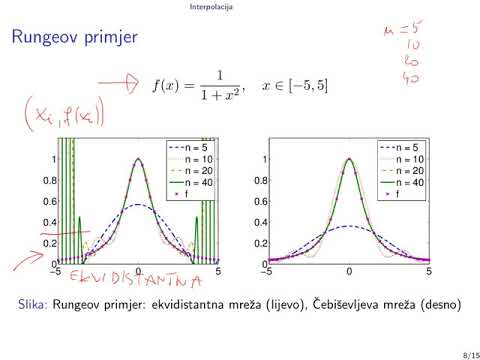

In [174]:
vid = YouTubeVideo("tVgrkWqOI6o")
display(vid)